In [1]:
import os
# don’t actually understand how/why this works with the OMP_NUM_THREADS=1
os.environ["OMP_NUM_THREADS"] = "1"
# https://forums.fast.ai/t/fastai-on-apple-m1/86059/39

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
from fastai.vision.all import *

/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
path = untar_data(URLs.PETS)

In [6]:
path.ls()

(#2) [Path('/Users/mton/.fastai/data/oxford-iiit-pet/images'),Path('/Users/mton/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
!ls -a

.                                 README.md
..                                copilotTest.js
.DS_Store                         fast-ai-dog-or-cat-tutorial.ipynb
.git                              helloworld.ipynb
.ipynb_checkpoints                helloworld.py
.venv                             pytorchnotes.txt
.vscode                           tutorial_play_the_game.ipynb


In [8]:
files = get_image_files(path/"images")
len(files)

7390

In [9]:
# type: ignore
# ?? returns source for any function
??get_image_files
# ? returns commment for any function
?get_image_files
# doc(func) gets document links
doc(get_image_files)

Signature: get_image_files(path, recurse=True, folders=None)
Docstring: Get image files in `path` recursively, only in `folders`, if specified.
File:      ~/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/fastai/data/transforms.py
Type:      function


In [10]:
files[0], files[6]

(Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 Path('/Users/mton/.fastai/data/oxford-iiit-pet/images/Birman_167.jpg'))

In [11]:
def label_func(f):
    return f[0].isupper()

In [12]:
files[0].name
#label_func(files)

'Egyptian_Mau_167.jpg'

In [13]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

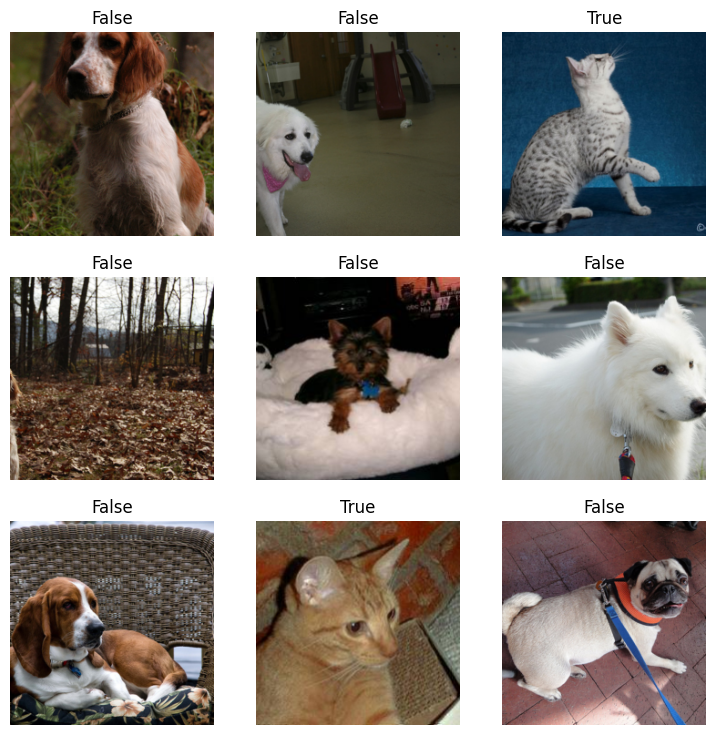

In [14]:
dls.show_batch()

In [ ]:
?ProgressCallback

In [16]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/mton/Documents/GitHub/JupyterJeep/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.168083,0.031533,0.013532,15:42


epoch,train_loss,valid_loss,error_rate,time
0,0.060270,0.014412,0.005413,20:04


In [ ]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path, get_image_files(path), valid_pct=0.2, seed=42, label_func=is_cat, item_tfms=Resize(224))
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)
